# Understanding Descriptive Statistics

Import the necessary libraries here:

In [79]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [80]:
# your code here
def roll_dice():
  results = np.random.choice([1,2,3,4,5,6], size=10)
  df = pd.DataFrame(results, columns=['value'])
  return df

#### 2.- Plot the results sorted by value.

<Axes: >

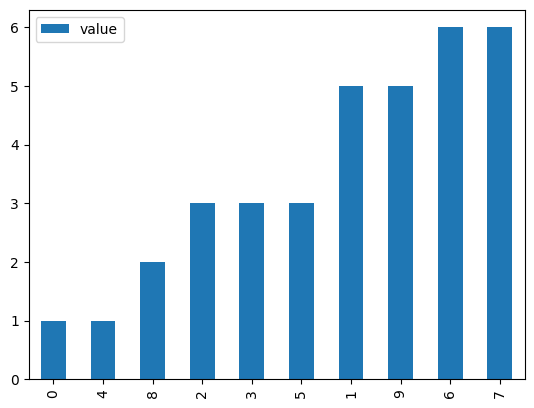

In [81]:
# your code here
dice_results = roll_dice()
dice_results.sort_values(by='value').plot(kind='bar')

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

<Axes: xlabel='value'>

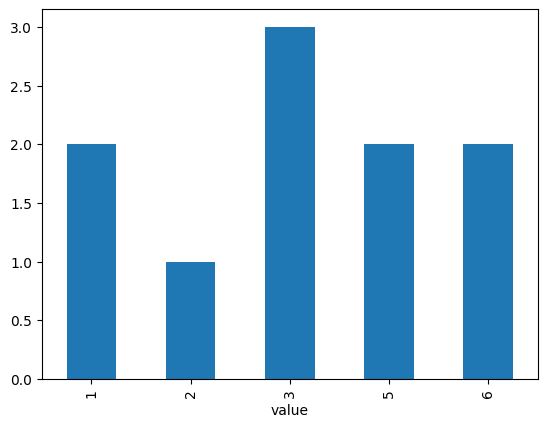

In [82]:
# your code here
dice_results.value.value_counts().sort_index().plot(kind='bar')

In [83]:
"""
1) the number of bars. WE have 10 on the 1st plot and only 4 on the 2nd, `cause the 1st plot is for each roll and the 2nd is for eveery value
2) value axis is now X axis, unlike the 1st plot.
3) we only have 4 values instead of all 6 as we had in the 1st plot. Only the values that were rolled appear on the 2nd graph
4)
"""

'\n1) the number of bars. WE have 10 on the 1st plot and only 4 on the 2nd, `cause the 1st plot is for each roll and the 2nd is for eveery value\n2) value axis is now X axis, unlike the 1st plot. \n3) we only have 4 values instead of all 6 as we had in the 1st plot. Only the values that were rolled appear on the 2nd graph\n4) \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles.

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value.

In [84]:
# your code here
def mean(df):
  return df.sum() / df.count()

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value.

<Axes: xlabel='value'>

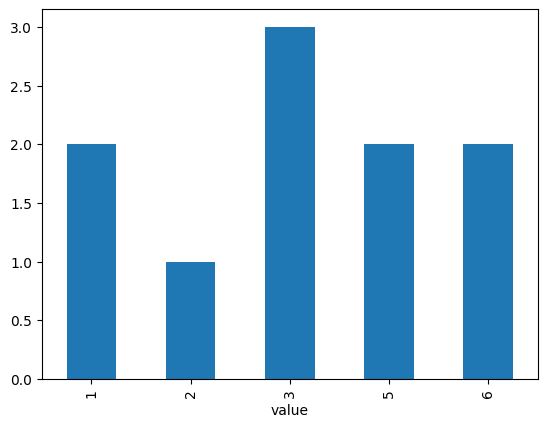

In [85]:
# your code here
#freuency distribution
dice_results.value.value_counts().sort_index().plot(kind='bar')

In [86]:
#claculating mean without using direct functions
def mean_from_freq(freq_dist):
  sum_of_products = 0
  total_count = 0
  for value, count in freq_dist.items():
    sum_of_products += value * count
    total_count += count
  mean = sum_of_products / total_count
  return mean

freq_dist = dice_results.value.value_counts()
mean_from_freq(freq_dist)

3.5

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value.
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [87]:
# your code here
def calculate_median(data):
  sorted_data = sorted(data)
  n = len(sorted_data)
  if n % 2 == 0:
    # even number of observations
    mid1 = sorted_data[n//2 - 1]
    mid2 = sorted_data[n//2]
    median = (mid1 + mid2) / 2
  else:
    # odd number of observations
    mid = n // 2
    median = sorted_data[mid]
  return median

calculate_median(dice_results['value'])


3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles.

In [88]:
# your code here
def calculate_quartiles(data):
  sorted_data = sorted(data)
  n = len(sorted_data)

  median = calculate_median(sorted_data)

  if n % 2 == 0:
    # even
    lower_half = sorted_data[:n//2]
    upper_half = sorted_data[n//2:]
  else:
    # odd
    lower_half = sorted_data[:n//2]
    upper_half = sorted_data[n//2+1:]

  q1 = calculate_median(lower_half)
  q3 = calculate_median(upper_half)

  return q1, median, q3

calculate_quartiles(dice_results['value'])

(2, 3.0, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

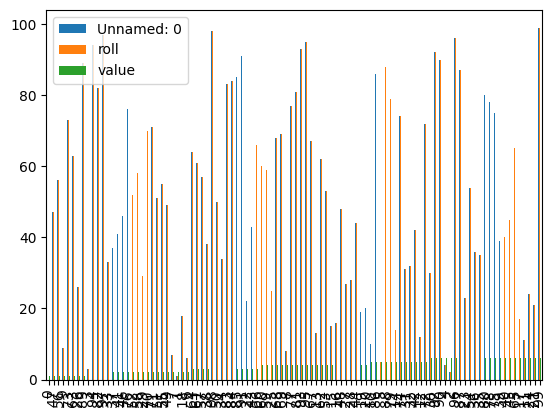

In [89]:
# your code here
df = pd.read_csv('roll_the_dice_hundred.csv')
df.sort_values(by='value').plot(kind='bar')
plt.show()

In [90]:
"""
I see lots of bars and the x-axis scale is incomrehendable, idk what numbers are there and couldn`t cahnge it to be visible,
 but in general it looks like a wierd  sinusoid to me """

'\nI see lots of bars and the x-axis scale is incomrehendable, idk what numbers are there and couldn`t cahnge it to be visible,\n but in general it looks like a wierd  sinusoid to me '

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [91]:
# your code here
mean(df['value'])

3.74

#### 3.- Now, calculate the frequency distribution.


<Axes: xlabel='value'>

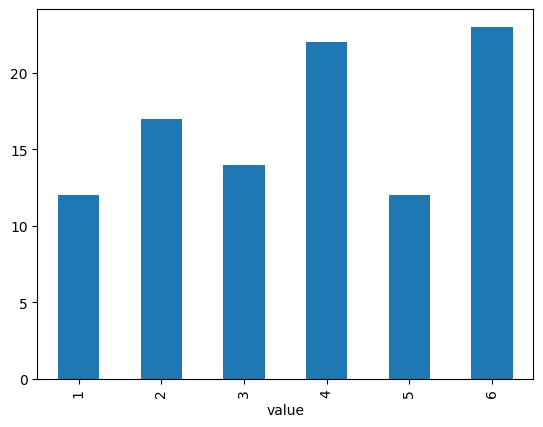

In [92]:
# your code here
df.value.value_counts().sort_index().plot(kind='bar')

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram?

<Axes: ylabel='Frequency'>

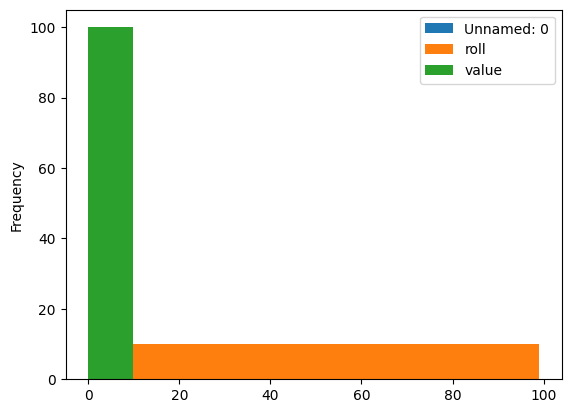

In [93]:
# your code here
df.plot(kind='hist')

In [94]:
"""
the shape is rly wierd, I dont get any information from the graph,
don`t know what it`s supposed to show... I might have a mistake somewhere"""

'\nthe shape is rly wierd, I dont get any information from the graph, \ndon`t know what it`s supposed to show... I might have a mistake somewhere'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

<Axes: xlabel='value'>

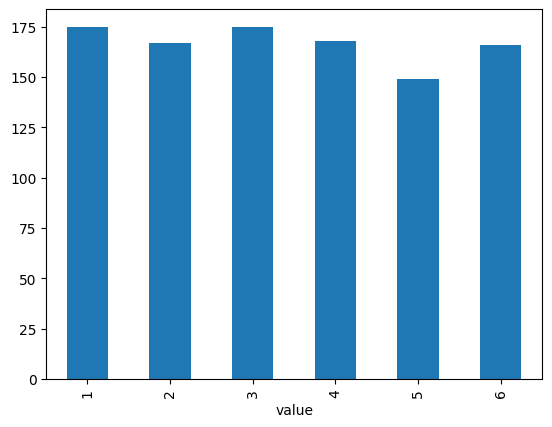

In [95]:
# your code here
df = pd.read_csv('roll_the_dice_thousand.csv')
df.value.value_counts().sort_index().plot(kind='bar')

In [96]:
"""
now we have all the 6  faces of the dice as we have more observations and all the faces appeared+ they have realtively even chance to appear"""

'\nnow we have all the 6  faces of the dice as we have more observations and all the faces appeared+ they have realtively even chance to appear'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot.

<Axes: xlabel='observation'>

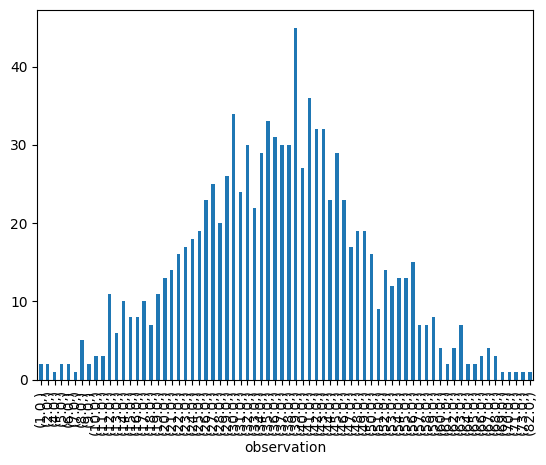

In [98]:
# your code here
df = pd.read_csv('ages_population.csv')
df.value_counts().sort_index().plot(kind='bar')
#and again: the x-axis is incomrehensible, I see no scale at all, it`s a mess.
#But, the mean will be close to median, I guesss and the deviation will be.. 1?
#the plot looks a lot like normal distribution

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [104]:
# your code here
mean_df = df.mean()
std_df = df.std()
print('mean_df is', mean_df)
print('std_df is', std_df)


mean_df is observation    36.56
dtype: float64
std_df is observation    12.8165
dtype: float64


In [ ]:
"""
not even close, I`ve missed comletely, but I cannot see the values on th x-axis, so no wonder..."""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

<Axes: xlabel='observation'>

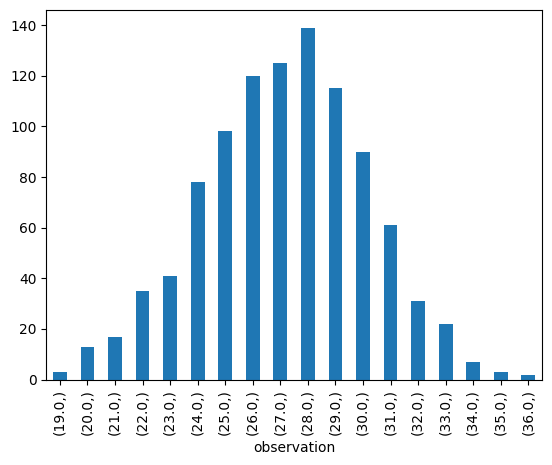

In [105]:
# your code here
df = pd.read_csv('ages_population2.csv')
df.value_counts().sort_index().plot(kind='bar')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
there`s definitely a difference, but in general he plots are showing the same normal distribution"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [106]:
# your code here
mean_df = df.mean()
std_df = df.std()
print('mean_df is', mean_df)
print('std_df is', std_df)

mean_df is observation    27.155
dtype: float64
std_df is observation    2.969814
dtype: float64


In [ ]:
"""
so, here people are 10 years younger and the age gap is much smaller"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

<Axes: xlabel='observation'>

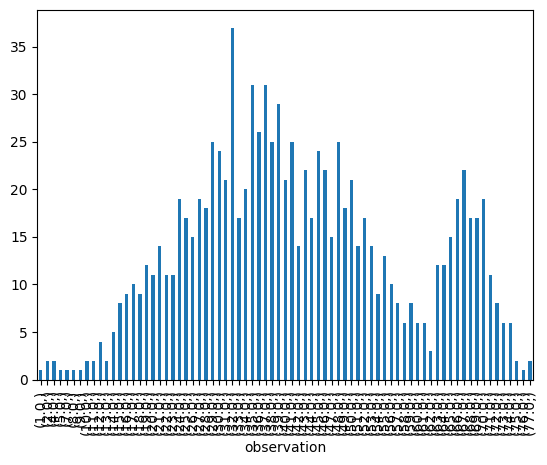

In [107]:
# your code here
df = pd.read_csv('ages_population3.csv')
df.value_counts().sort_index().plot(kind='bar')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [108]:
# your code here
mean_df = df.mean()
std_df = df.std()
print('mean_df is', mean_df)
print('std_df is', std_df)

mean_df is observation    41.989
dtype: float64
std_df is observation    16.144706
dtype: float64


In [ ]:
"""
people here are much older! Almost 42 years average!
POpulation is geting older which I`d say is bad for the countrey`s economy and societyю
Also, the std shows us a huge gap of 16 years between reponses, which indicates a highly diverse age group. """

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [113]:
# your code here
# Calculate quartiles
q1 = df.quantile(0.25)
q2 = df.quantile(0.5)  # Median
q3 = df.quantile(0.75)
q4 = df.quantile(1)

# Calculate mean
mean = df.mean()

# Print the results
print(f"Q1: {q1}")
print(f"Q2: {q2}")
print(f"Q3: {q3}")
print(f"Q4: {q4}")

print(f"Mean: {mean}")

# Calculate the difference between median and mean
difference = mean - q2
print(f"Difference between median and mean: {difference}")

Q1: observation    30.0
Name: 0.25, dtype: float64
Q2: observation    40.0
Name: 0.5, dtype: float64
Q3: observation    53.0
Name: 0.75, dtype: float64
Q4: observation    77.0
Name: 1.0, dtype: float64
Mean: observation    41.989
dtype: float64
Difference between median and mean: observation    1.989
dtype: float64


In [ ]:
"""
the difference = 1.989, which skews our data to the right, positively.
Q2 is 40 and mean is 42 which is quite close. """

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [114]:
# your code here
# Calculate the 90th percentile
percentile_90 = df.quantile(0.9)

# Print the result
print(f"90th percentile: {percentile_90}")

90th percentile: observation    67.0
Name: 0.9, dtype: float64


In [ ]:
"""
Q4 is 77, but the 0.9 percentile is only 67m which gives us a gap of 10 years for 10% of respondents!
I guess we should consider people older that 67 outliers"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here



In [ ]:
"""
Possible Interpretations:

Dataset 2: This dataset might represent a specific age group, such as young adults or university students, due to its low mean and small standard deviation.

Dataset 3: This dataset could represent a broader population sample, possibly including multiple generations, as indicated by its higher mean and larger standard deviation.

Dataset 1: This dataset might represent a more focused age group with a moderate level of diversity, such as employees within a company or members of a particular community.

Conclusion:

The analysis reveals significant differences in the age distributions across the three datasets.
Dataset 2 represents a younger and more homogeneous age group, while Dataset 3 represents a more diverse and potentially older population.
Dataset 1 falls in between, with a moderate level of age diversity."""